<a href="https://colab.research.google.com/github/pherie/tesis/blob/master/jarak_euclidean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!dir

sample_data


In [0]:
!git clone https://github.com/pherie/tesis.git

Cloning into 'tesis'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [0]:
cd tesis

/content/tesis


In [0]:
from numpy import load, expand_dims
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.svm import SVC
from random import choice
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
from scipy.spatial import distance
import numpy as np

In [0]:
# load faces
data = load('orangtu.npz')
trainX_faces, testX_faces = data['arr_0'], data['arr_2']

# load face embeddings
data = load('orangtu-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
target = trainy

# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

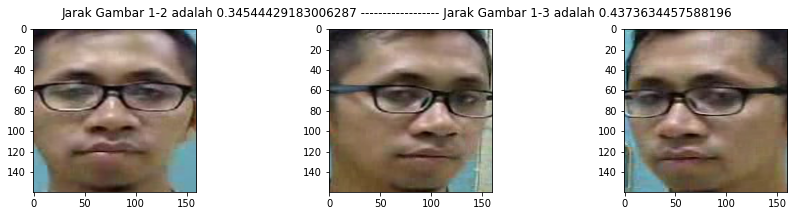

In [0]:
def show_pair(idx1, idx2, idx3):
    plt.figure(figsize=(15,3))
    #plt.suptitle(f'Jarak = {distance.euclidean(trainX[idx1], trainX[idx2]):.2f}')
    jarak1 = distance.euclidean(trainX[idx1], trainX[idx2])
    jarak2 = distance.euclidean(trainX[idx1], trainX[idx3])
    plt.suptitle('Jarak Gambar 1-2 adalah %s ------------------ Jarak Gambar 1-3 adalah %s' % (jarak1,jarak2))
    plt.subplot(131)
    plt.imshow(trainX_faces[idx1])
    plt.subplot(132)
    plt.imshow(trainX_faces[idx2])
    plt.subplot(133)
    plt.imshow(trainX_faces[idx3]);
show_pair(0,8,13)

In [0]:
import pandas as pd
from pandas import ExcelWriter

In [0]:
distances = [] # squared L2 distance between pairs
identical = [] # 1 if same identity, 0 otherwise

num = len(trainX)

for i in range(num - 1):
    for j in range(i + 1, num):
        distances.append(distance.euclidean(trainX[i], trainX[j]))
        identical.append(88 if (target[i] == 'oki') & (target[j] == 'rofik') else 99)
        
distances = np.array(distances)
identical = np.array(identical)
df = pd.DataFrame({'dist': distances, 'iden':identical})
df.to_excel('jarak-oki-rofik.xlsx')

Text(0.5, 1.0, 'Identik')

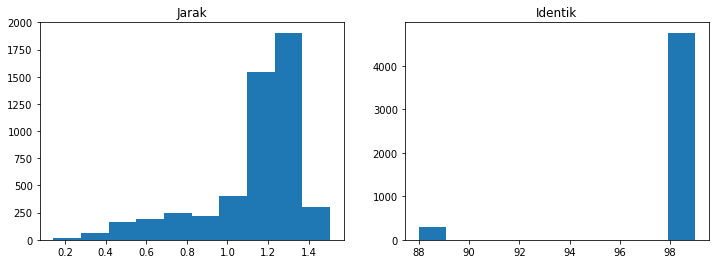

In [0]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.hist(distances)
plt.title('Jarak')

plt.subplot(122)
plt.hist(identical)
plt.title('Identik')

In [0]:
distances = [] # squared L2 distance between pairs
identical = [] # 1 if same identity, 0 otherwise

num = len(trainX)

for i in range(num - 1):
    for j in range(i + 1, num):
        distances.append(distance.euclidean(trainX[i], trainX[j]))
        identical.append(1 if trainy[i] == trainy[j] else 0)
        
distances = np.array(distances)
identical = np.array(identical)
thresholds = np.arange(0.1, 1.5, 0.01)

f1_scores = [f1_score(identical, distances < t) for t in thresholds]
acc_scores = [accuracy_score(identical, distances < t) for t in thresholds]

opt_idx = np.argmax(f1_scores)
# Threshold at maximal F1 score
opt_tau = thresholds[opt_idx]
# Accuracy at maximal F1 score
opt_acc = accuracy_score(identical, distances < opt_tau)

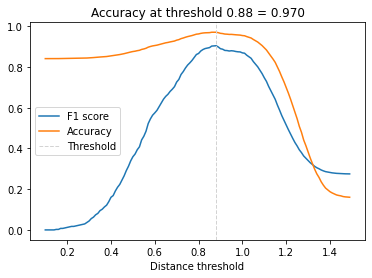

In [0]:
# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, f1_scores, label='F1 score');
plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}');
plt.xlabel('Distance threshold')
plt.legend();

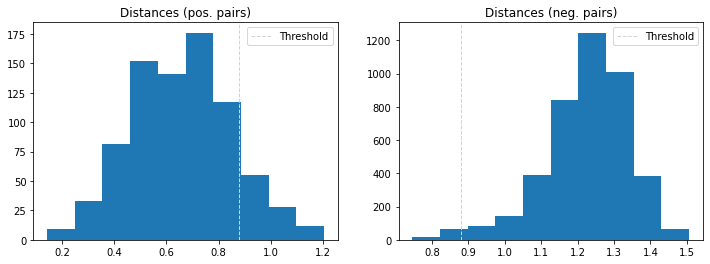

In [0]:
dist_pos = distances[identical == 1]
dist_neg = distances[identical == 0]

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.hist(dist_pos)
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title('Distances (pos. pairs)')
plt.legend();

plt.subplot(122)
plt.hist(dist_neg)
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title('Distances (neg. pairs)')
plt.legend();

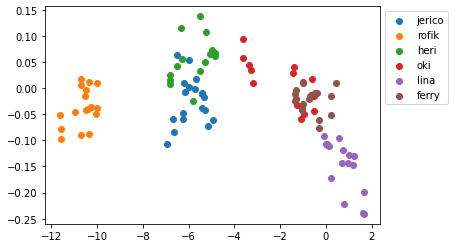

In [0]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(trainX)

for i, t in enumerate(set(target)):
    idx = targets == t
    plt.scatter(X_embedded[idx, 0], trainX[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1));
